# Análisis Cualitativo Comparativo por Tipo de Actor
Este notebook permite analizar los códigos generados por GPT-4o agrupados por tipo de actor, a partir del archivo `codigos_todas_entrevistas.csv`.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/MyDrive/_Luz Stella Doctorado/Mario Chamie Mazzilli/1_Audios_Archivos .m4a/Prueba_Piloto_3_con_IA_Assist")

In [ ]:
os.getcwd()

'/content/drive/MyDrive/_Luz Stella Doctorado/Mario Chamie Mazzilli/1_Audios_Archivos .m4a/Prueba_Piloto_3_con_IA_Assist'

## 1. Cargar el archivo de codificación

In [ ]:
import pandas as pd
# El notebook anterior genera el archivo con el nombre "codigos_todas_entrevistas.csv"
df = pd.read_csv("codigos_todas_entrevistas.csv")
df.head()

,codigo,descripcion,archivo,actor
0,participacion_comunitaria,Experiencias y valoraciones de los actores com...,comunidad_voz_036.txt,Comunidad
1,desarrollo_capacidades,Propuestas y experiencias relacionadas con el ...,comunidad_voz_036.txt,Comunidad
2,proceso_entrevista,Aspectos relacionados con el consentimiento in...,comunidad_voz_036.txt,Comunidad
3,caracterizacion_participante,Datos demográficos y de identificación del par...,comunidad_voz_036.txt,Comunidad
4,enfoque_diferencial,Consideraciones relacionadas con característic...,comunidad_voz_036.txt,Comunidad


## 2. Frecuencia de códigos por actor

In [ ]:
frecuencia_actor_codigo = df.groupby(["actor", "codigo"]).size().reset_index(name="frecuencia")
pivot_frecuencia = frecuencia_actor_codigo.pivot(index="codigo", columns="actor", values="frecuencia").fillna(0).astype(int)
pivot_frecuencia.head()

actor,Comunidad,Institución
codigo,,
Caracterizacion_Institucional,1,0
Confidencialidad,1,0
Consentimiento_Informado,1,0
Coordinacion_Interinstitucional,1,0
Desarrollo_Capacidades,1,0


## 3. Visualización: frecuencia de códigos por actor (gráfico de barras apiladas)

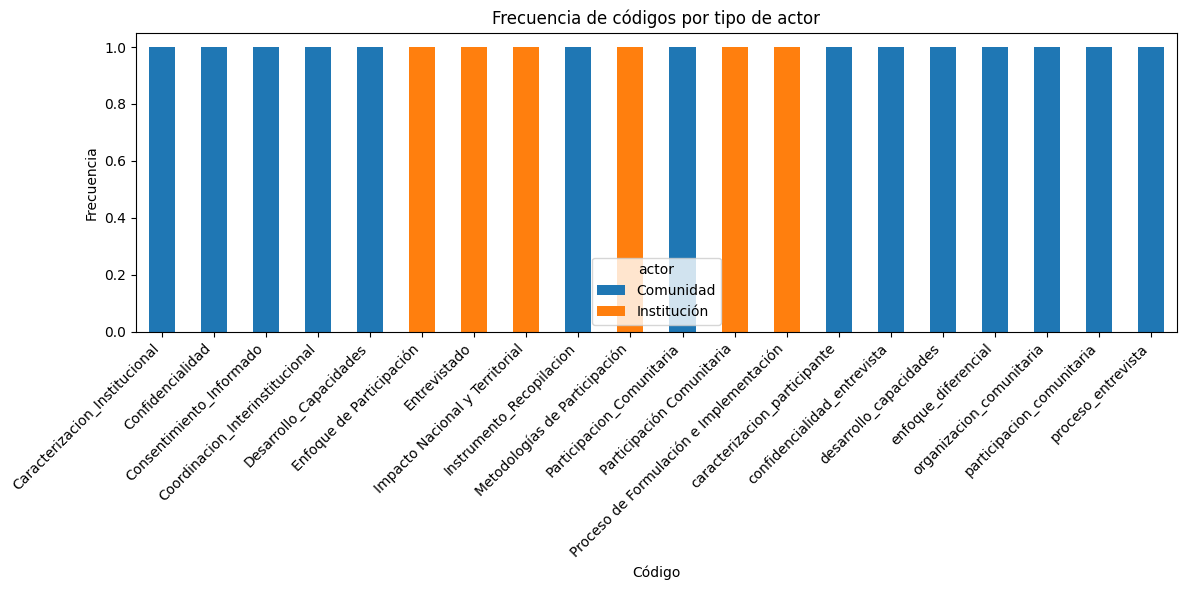

In [ ]:
import matplotlib.pyplot as plt

pivot_frecuencia.plot(kind="bar", stacked=True, figsize=(12, 6))
plt.title("Frecuencia de códigos por tipo de actor")
plt.ylabel("Frecuencia")
plt.xlabel("Código")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## 4. Matriz de presencia (presencia/ausencia de código por actor)

In [ ]:
presencia = pivot_frecuencia.copy()
presencia[presencia > 0] = 1
presencia.head()

actor,Comunidad,Institución
codigo,,
Caracterizacion_Institucional,1,0
Confidencialidad,1,0
Consentimiento_Informado,1,0
Coordinacion_Interinstitucional,1,0
Desarrollo_Capacidades,1,0


## 5. Visualización: matriz de calor (presencia binaria)

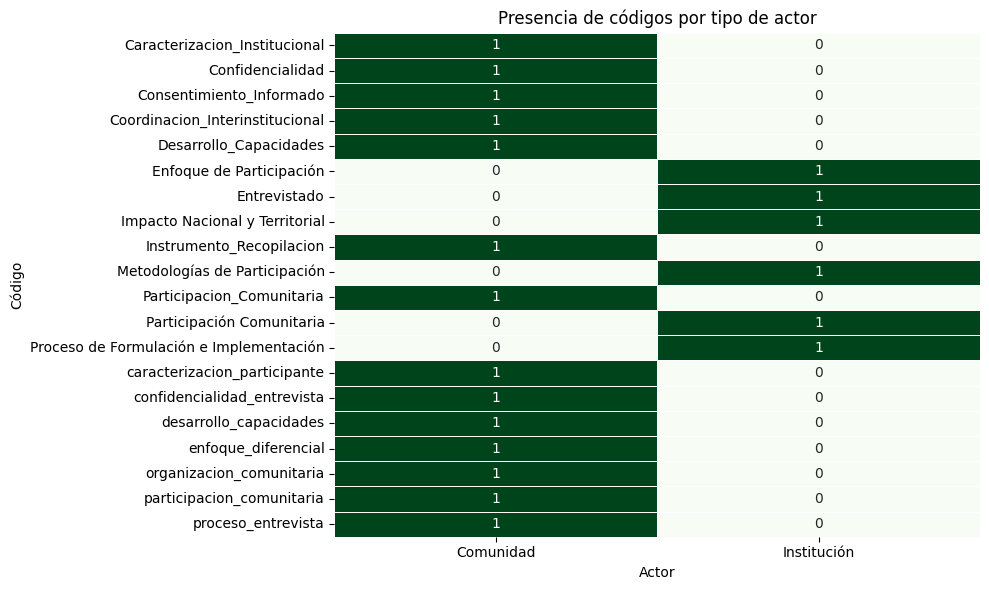

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(presencia, annot=True, cmap="Greens", cbar=False, linewidths=.5, fmt="d")
plt.title("Presencia de códigos por tipo de actor")
plt.ylabel("Código")
plt.xlabel("Actor")
plt.tight_layout()
plt.show()

## 6. Exportar tablas a CSV

In [ ]:
pivot_frecuencia.to_csv("tabla_frecuencia_codigos_por_actor.csv")
presencia.to_csv("tabla_presencia_codigos_por_actor.csv")
print("✅ Tablas exportadas exitosamente.")

✅ Tablas exportadas exitosamente.
